In [3]:
import numpy as np
import matplotlib.pyplot as plt

Task: Use Gradient Descent to create a linear regression to most accurately predict housing prices based on some training examples

In [4]:


#x_train is the input variable, the size of the house in 1000 sq ft
#y_train is the output variable, the price of the house in $1000
#this is the training data

x_train = np.array([1.0, 2.0,3.0, 4.0, 5.0, 6.0, 7.0])
y_train = np.array([300.0, 500.0, 600.0, 650.0, 600.0, 800.0, 850.0])


In [5]:
#the below line will return an array representing the dimensions of the nparray
print(x_train.shape)
#m is used to represent the number of examples in the training data
m = x_train.shape[0]
print("the number of training examples are: ",m)

(7,)
the number of training examples are:  7


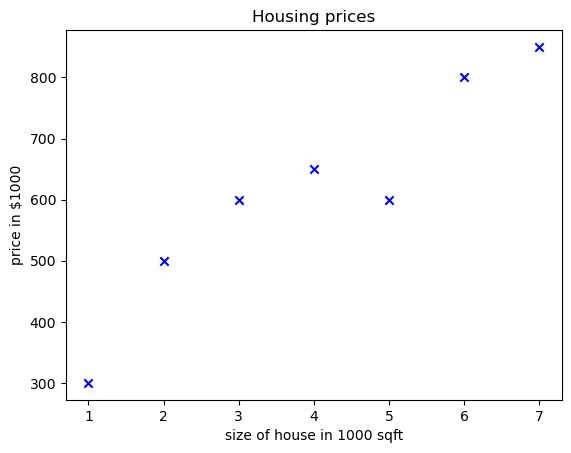

In [6]:
#how to plot data as a scatterplot with matplotlib
plt.scatter(x_train, y_train, marker = "x", c = "b")
#setting the title
plt.title("Housing prices")
plt.ylabel("price in $1000")
plt.xlabel("size of house in 1000 sqft")
plt.show()

In [7]:
def compute_model_output(x, w, b):
    '''
    Computes the prediction of a linear model
    Args:
    x (ndarray (m,)): Data, m examples 
      w,b (scalar)    : model parameters  
    Returns
      f_wb (ndarray (m,)): model prediction
    '''
    
    m = x.shape[0]
    f_wb = np.zeros(m)
    
    for i in range (m):
        f_wb[i]= w * x[i] + b
    return f_wb

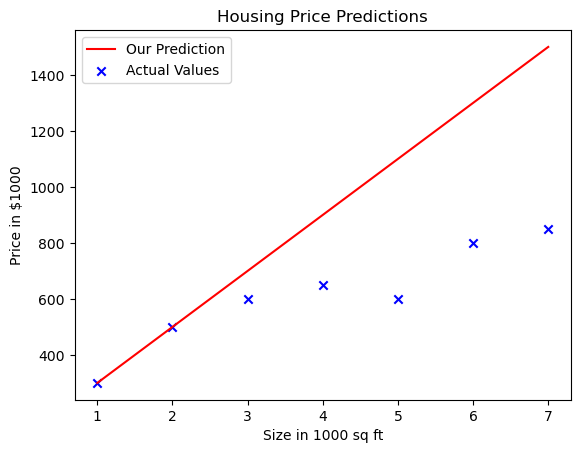

In [8]:
#Set a random weight and bias for the lineear regression and plot it just to get an idea of the data

tmp_f_wb = compute_model_output(x_train, 200, 100)

#make a plot of prediction
plt.plot(x_train, tmp_f_wb, marker = "", c = "r", label = "Our Prediction")

#scatter plot of data points 
plt.scatter(x_train, y_train, marker = "x", c = "b", label = "Actual Values")

#setting up title, subtitles

plt.title("Housing Price Predictions")
plt.ylabel("Price in $1000")
plt.xlabel("Size in 1000 sq ft")
plt.legend()
plt.show()


In [9]:
#The cost function

def compute_cost(x,y,w,b):
    '''
    computes cost function for linear regression
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    '''
    
    m = x.shape[0] #number of training examples 
    
    total_cost = 0
    
    for i in range(m):
        f_wb_i = w * x[i] + b               #model prediction
        total_cost += (f_wb_i - y[i])**2    #mean-squared error
        
    total_cost = total_cost*(1/(2.0*m))     #divide by 2m to get the average
    
    return total_cost

In [10]:
#gradient function, it calculates derivative of the cost

def compute_gradient(x, y, w, b):

    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    """
    A formula for the value of the gradient is found by using chain rule, we counterintuitively divided by 2
    in cost formula to account for the exponent multiplying in the gradient calculation.
    """
    
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    
    for i in range (m):
        f_wb_i = w * x[i] + b
        dj_dw += (f_wb_i - y[i]) * x[i]      
        dj_db += (f_wb_i - y[i])
    dj_dw *= (1.0/m)
    dj_db *= (1.0/m)
    
    return dj_dw, dj_db

In [11]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      """
    
    m = x.shape[0]
    
    #iteratively optimizing w and b by nudging them in the direction of steepest descent
    for i in range (num_iters):
        #compute gradient
        dj_dw, dj_db = gradient_function(x, y, w_in, b_in)
        
        #update w and b
        w_in = w_in - alpha * dj_dw
        b_in = b_in - alpha * dj_db
    
    return w_in, b_in
        
        

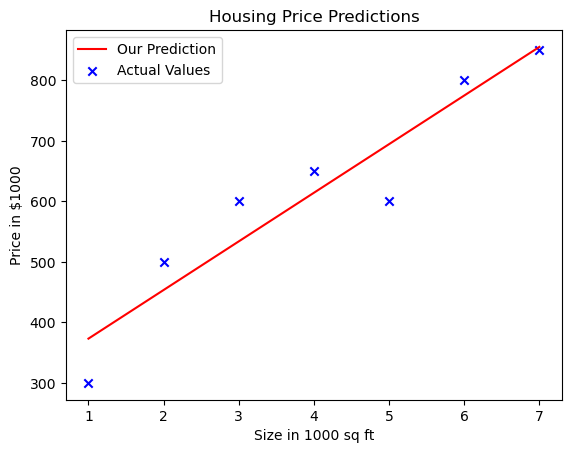

w value is:  80.35714309320642 b value is:  292.85714168817003


In [12]:
w, b = gradient_descent(x_train, y_train, 0, 0, 1.0e-2, 10000, compute_gradient)

model_f_wb = compute_model_output(x_train, w, b)

#make a plot of prediction
plt.plot(x_train, model_f_wb, marker = "", c = "r", label = "Our Prediction")

#scatter plot of data points 
plt.scatter(x_train, y_train, marker = "x", c = "b", label = "Actual Values")

#setting up title, subtitles

plt.title("Housing Price Predictions")
plt.ylabel("Price in $1000")
plt.xlabel("Size in 1000 sq ft")
plt.legend()
plt.show()

print('w value is: ',w,'b value is: ', b)
